In [25]:
# Semana 1 – Setup del proyecto btc_price
# Objetivo: Obtener datos OHLCV de btc_price y guardarlos en formato Parquet

# Instalar librerías necesarias (solo si hace falta)
!pip install yfinance pyarrow ccxt

In [26]:
# Conectar con Google Drive para guardar datos
from google.colab import drive
drive.mount('/content/drive')

# Crear carpetas del proyecto en Google Drive
import os

base_dir = "/content/drive/MyDrive/btc_price_prediction_project"
data_dir = os.path.join(base_dir, "data")
os.makedirs(data_dir, exist_ok=True)

# Descargar datos de btc_price con yfinance
import yfinance as yf
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
btc_price = yf.download("BTC-USD", start="2010-01-01", end="2025-06-21", interval="1d")
btc_price.to_parquet(f"{data_dir}/btc_price_yfinance.parquet")

# Mostrar últimas filas como validación
btc_price.head()

/tmp/ipython-input-68-2088935551.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_price = yf.download("BTC-USD", start="2010-01-01", end="2025-06-21", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [57]:
btc_price.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [76]:
# Aplana las columnas uniendo los niveles del MultiIndex
btc_price.columns = [f"{col[0]}_{col[1]}" for col in btc_price.columns]

btc_price.columns

Index(['price_Close_price_BTC-USD', 'price_High_price_BTC-USD',
       'price_Low_price_BTC-USD', 'price_Open_price_BTC-USD',
       'price_Volume_price_BTC-USD'],
      dtype='object')

In [59]:
# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {btc_price.shape[0]}")
print(f"Número de columnas: {btc_price.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(btc_price.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(btc_price.isnull().sum())
print()

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", btc_price.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = btc_price.columns[btc_price.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(btc_price.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(btc_price.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = btc_price.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {btc_price[col].mean():.2f}")
    print(f"Desviación estándar: {btc_price[col].std():.2f}")
    print(f"Mínimo: {btc_price[col].min()}")
    print(f"Máximo: {btc_price[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = btc_price.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {btc_price[col].nunique()}")
    print(f"Moda (categoría más frecuente): {btc_price[col].mode()[0]}")
    print()


Tamaño del dataset:
Número de filas: 3282
Número de columnas: 5

Columnas del dataset:
Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')

Número de valores nulos por columna:
Close_BTC-USD     0
High_BTC-USD      0
Low_BTC-USD       0
Open_BTC-USD      0
Volume_BTC-USD    0
dtype: int64


Nombres de las columnas después de la eliminación: Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')
No hay columnas completamente vacías.

Tipos de datos de las columnas:
Close_BTC-USD     float64
High_BTC-USD      float64
Low_BTC-USD       float64
Open_BTC-USD      float64
Volume_BTC-USD      int64
dtype: object

Resumen estadístico de las variables numéricas:
                 count          mean           std           min  \
Close_BTC-USD   3282.0  7.472063e+04  1.933888e+04  38761.878906   
High_BTC-USD    3282.0  7.521845e+04  1.944305e+04  39264.496094   
Low

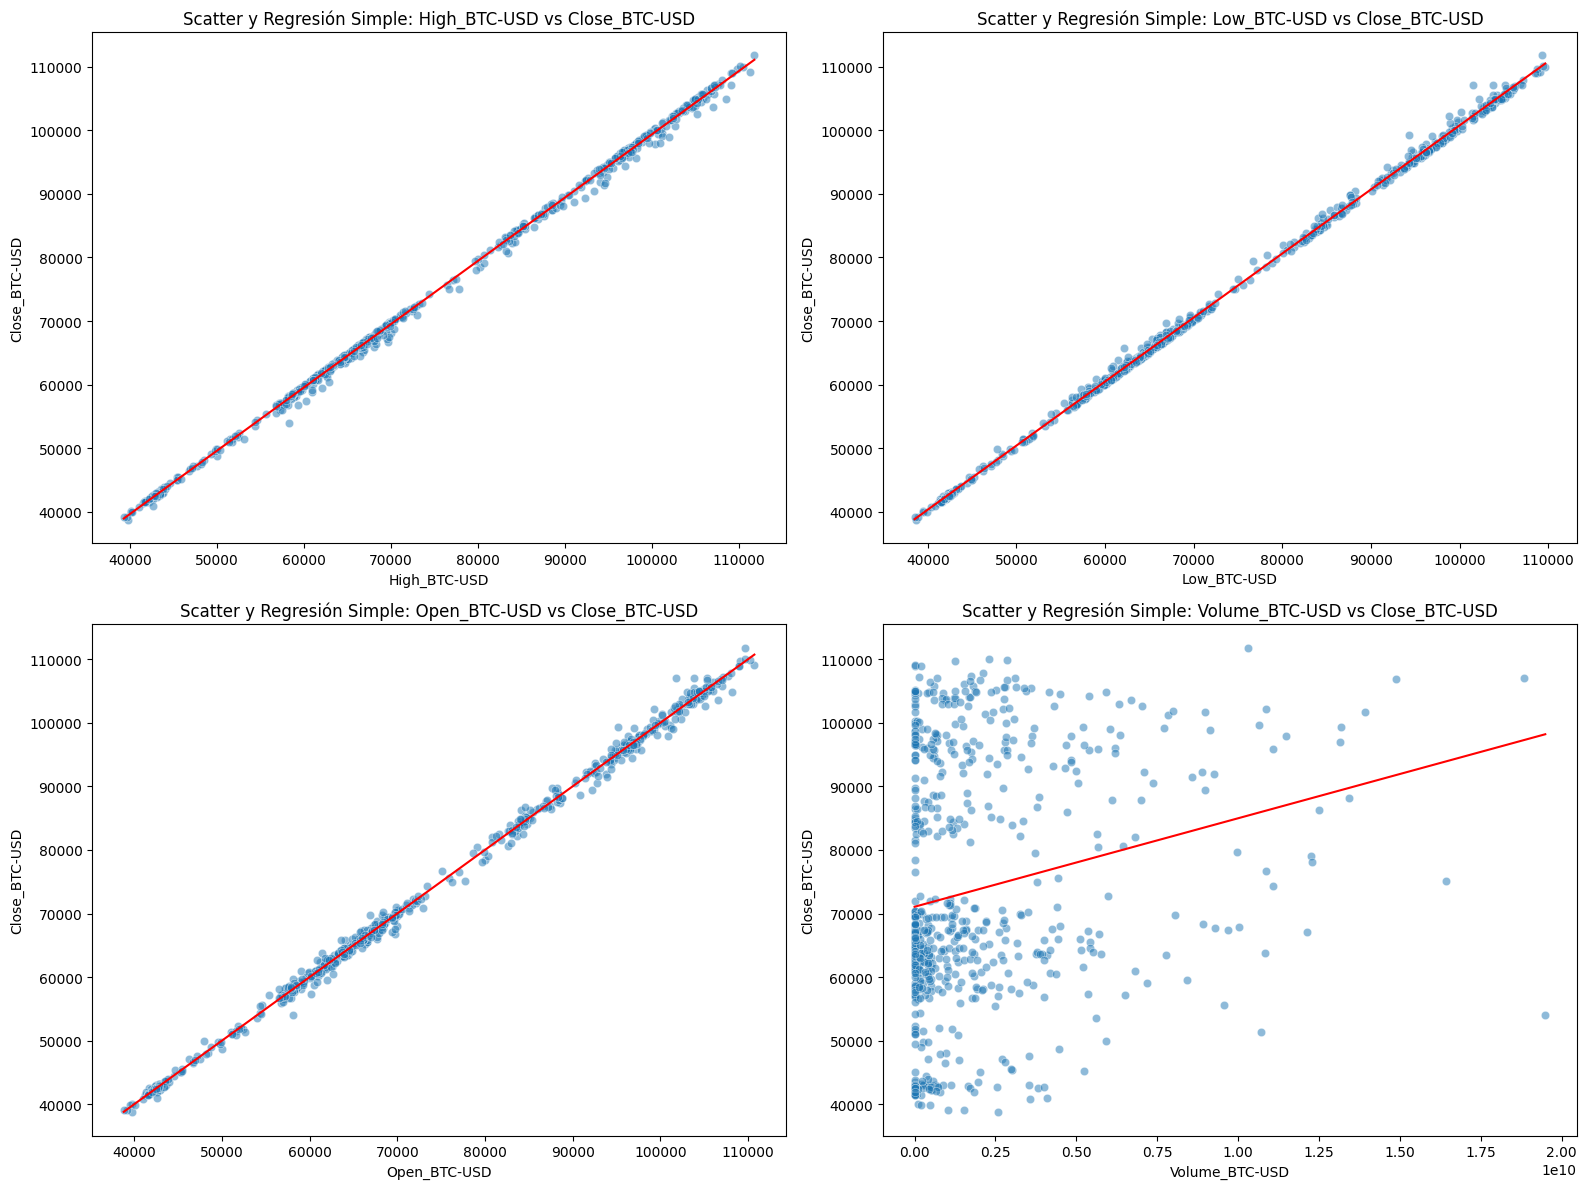

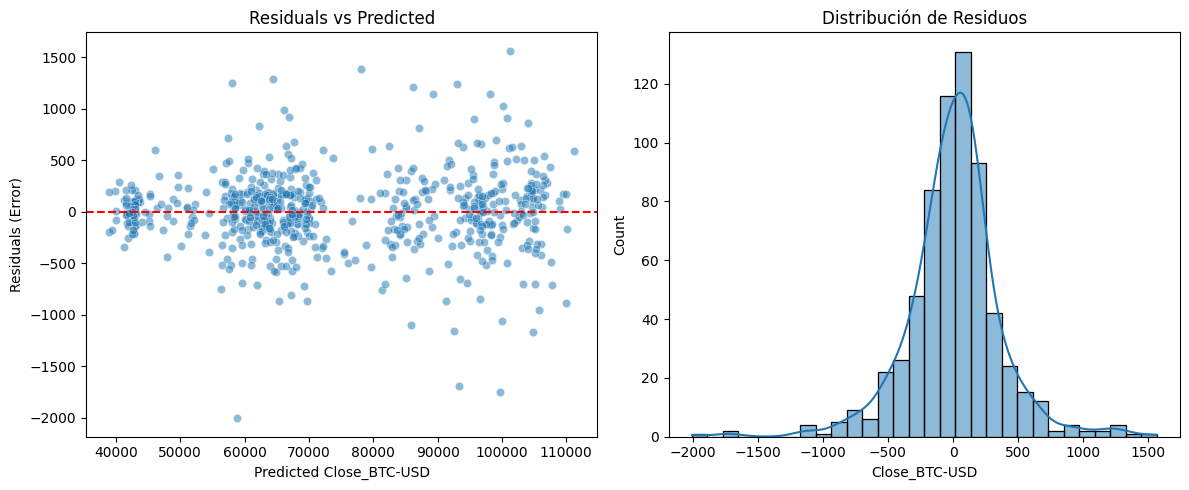

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variables predictoras
X = btc_price[['High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD', 'Volume_BTC-USD']]
y = btc_price['Close_BTC-USD']

# Dividir datos (entrenamiento y prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en test
y_test_pred = model.predict(X_test)

# ----------- 1. Visualización: Scatter + línea de regresión para cada predictor -----------

plt.figure(figsize=(16, 12))

predictors = X.columns
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    # Scatter plot de variable vs objetivo (solo conjunto test para ver generalización)
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5)

    # Para dibujar línea de regresión simple, calculamos la relación solo con esa variable
    # Nota: Como el modelo es multivariado, esta línea no representa el modelo completo, pero ayuda a visualizar tendencia.
    # Usamos numpy polyfit para línea simple:
    m, b = np.polyfit(X_test[col], y_test, 1)
    x_vals = np.linspace(X_test[col].min(), X_test[col].max(), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red')

    plt.title(f'Scatter y Regresión Simple: {col} vs Close_BTC-USD')
    plt.xlabel(col)
    plt.ylabel('Close_BTC-USD')

plt.tight_layout()
plt.show()

# ----------- 2. Análisis residual -----------

# Residuos en test set
residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Close_BTC-USD')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs Predicted')

# Histograma de residuos para ver distribución
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()